In [1]:
import sys 
import argparse
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

In [2]:
def get_days_from_start(str_date, start_date = dt.date(2021, 1, 1)):
    if len(str.split(str_date, '-')) == 3:
#         return (dt.date.fromisoformat(str_date) - start_date).days
        curr_year, curr_month, curr_day = map(int, str.split(str_date, '-'))
        curr_date = dt.date(curr_year, curr_month, curr_day)
        return (curr_date - start_date).days
    else:
        return np.nan

In [4]:
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

df_probe_meta_il = pd.read_csv('delta/Illinois_delta_results.csv')
df_probe_meta_usa = pd.read_csv('delta/usa_delta_results.csv')

In [5]:
def get_condensed_lineage(lineage, resolution):
    if lineage != lineage:
        return lineage
    split_lineage = lineage.split('.')
    if len(split_lineage) < resolution:
        return lineage
    else:
        return '.'.join(split_lineage[:resolution])

In [6]:
def get_sensitivity_specificity(df_probe_meta, lineage_list, key):
    p = 0
    for lineage in lineage_list:
        resolution = len(lineage.split('.'))
        p += sum(df_probe_meta['Pango lineage'].apply(lambda x: get_condensed_lineage(x, resolution)) == lineage)    
    n = len(df_probe_meta) - p
    
    tp = 0
    for lineage in lineage_list:
        resolution = len(lineage.split('.'))
        tp += sum(df_probe_meta[df_probe_meta[key]]['Pango lineage'].apply(lambda x: get_condensed_lineage(x, resolution)) == lineage)
    fn = p - tp
    
    fp = len(df_probe_meta[df_probe_meta[key]]) - tp
    tn = n - fp
    
    return tp / p, tn / n

In [8]:
df_target_delta = pd.read_csv('delta/delta_target_sequences.csv')

In [9]:
ss_data = []
for key in df_target_delta['id']:
    ss_data.append([key] +  list(get_sensitivity_specificity(df_probe_meta_il, ['B.1.617.2', 'AY'], key)))

In [10]:
df_ss = pd.DataFrame(ss_data, columns=['id', 'sensitivity', 'specificity'])

In [11]:
df_ss.at[6, 'id'] = 'Δ156/157'

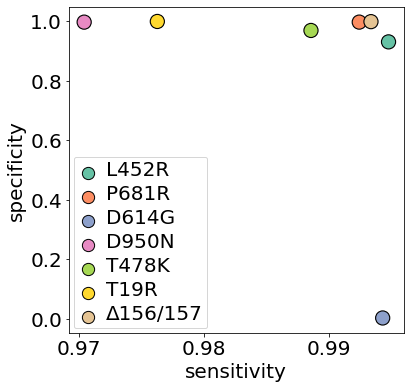

In [12]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(data=df_ss, hue='id', x='sensitivity', y='specificity', s=200, palette='Set2', edgecolor='k')

# Get the legend handles
handles, labels = ax.get_legend_handles_labels()

# Iterate through the handles and call `set_edgecolor` on each
for ha in handles:
    ha.set_edgecolor("k")
    ha.set_sizes([150])

# Use `ax.legend` to set the modified handles and labels
lgd = ax.legend(
    handles, 
    labels,
    loc="lower left", 
    ncol=1,
)

plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='0') # for legend title

plt.savefig('figures/ss_delta_IL.pdf', bbox_inches='tight')

In [ ]:
us_ss_data = []
for key in df_target_delta['id']:
    us_ss_data.append([key] +  list(get_sensitivity_specificity(df_probe_meta_usa, ['B.1.617.2', 'AY'], key)))

In [ ]:
df_us_ss = pd.DataFrame(us_ss_data, columns=['id', 'sensitivity', 'specificity'])

In [ ]:
df_us_ss.at[6, 'id'] = 'Δ156/157'

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(data=df_us_ss, hue='id', x='sensitivity', y='specificity', s=200, palette='Set2', edgecolor='k')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='0') # for legend title

# Get the legend handles
handles, labels = ax.get_legend_handles_labels()

# Iterate through the handles and call `set_edgecolor` on each
for ha in handles:
    ha.set_edgecolor("k")
    ha.set_sizes([150])    

# Use `ax.legend` to set the modified handles and labels
lgd = ax.legend(
    handles, 
    labels,
    loc="lower left", 
    ncol=1,
)

plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='0') # for legend title

plt.savefig('figures/ss_delta_US.pdf', bbox_inches='tight')